In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [10]:
df = pd.read_csv(r"D:\MLOps Udemy Krish Naik\MLops Project\notebooks\data\student.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
x = df.drop(columns=["math_score"],axis = 1)

In [14]:
y = df['math_score']

In [19]:
num_col = x.select_dtypes(exclude = "object").columns
num_col

Index(['reading_score', 'writing_score'], dtype='object')

In [21]:
num_col = x.select_dtypes(exclude = "object").columns
cat_col = x.select_dtypes(include = "object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

scaling = StandardScaler()
ohe = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",ohe,cat_col),
        ("StandardScaler",scaling,num_col),
    ]
)

In [22]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [23]:
x = preprocessor.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [28]:
def eval_mat(true,pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mean_squared_error(true,pred))
    r2 = r2_score(true,pred)
    return mae,mse,rmse,r2

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGB Regressor":XGBRegressor(),
    "Cat Boost Regressor":CatBoostRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor()
}
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_model_mae,train_model_mse,train_model_rmse,train_model_r2 = eval_mat(y_train,y_train_pred)
    test_model_mae,test_model_mse,test_model_rmse,test_model_r2 = eval_mat(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for training set:")
    print(f"Root Mean Squared Error: {train_model_rmse}")
    print(f"Mean absolute Error: {train_model_mae}")
    print(f"R2 score: {train_model_r2}")

    print("<--------------------------------------->")

    print("Model Performance for testing set:")
    print(f"Root Mean Squared Error: {test_model_rmse}")
    print(f"Mean absolute Error: {test_model_mae}")
    print(f"R2 score: {test_model_r2}")

    r2_list.append(test_model_r2)

    print("="*35)
    print("\n")

Linear Regression
Model Performance for training set:
Root Mean Squared Error: 5.235097285753971
Mean absolute Error: 4.12810546875
R2 score: 0.8780900875649948
<--------------------------------------->
Model Performance for testing set:
Root Mean Squared Error: 5.709387080070691
Mean absolute Error: 4.732265625
R2 score: 0.8691399640240265


Lasso
Model Performance for training set:
Root Mean Squared Error: 6.471155545694707
Mean absolute Error: 5.109366201108116
R2 score: 0.8137255954452095
<--------------------------------------->
Model Performance for testing set:
Root Mean Squared Error: 6.468873307517068
Mean absolute Error: 5.104003154957463
R2 score: 0.8320092570886459


Ridge
Model Performance for training set:
Root Mean Squared Error: 5.232365999758731
Mean absolute Error: 4.122654262033775
R2 score: 0.878217261506026
<--------------------------------------->
Model Performance for testing set:
Root Mean Squared Error: 5.716632392913387
Mean absolute Error: 4.740890609999773
R

In [33]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name',"R2_score"]).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
0,Linear Regression,0.869140
2,Ridge,0.868808
7,Cat Boost Regressor,0.852300
5,Random Forest Regressor,0.851281
8,Ada Boost Regressor,0.834837
1,Lasso,0.832009
6,XGB Regressor,0.830302
3,K-Neighbors Regressor,0.770437
4,Decision Tree,0.726133


In [34]:
lr = LinearRegression(fit_intercept=True)
lr = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
score = r2_score(y_test,y_pred)*100
print(f"Accuract of model is {score}")


Accuract of model is 86.91399640240265


Text(0, 0.5, 'Pedicted')

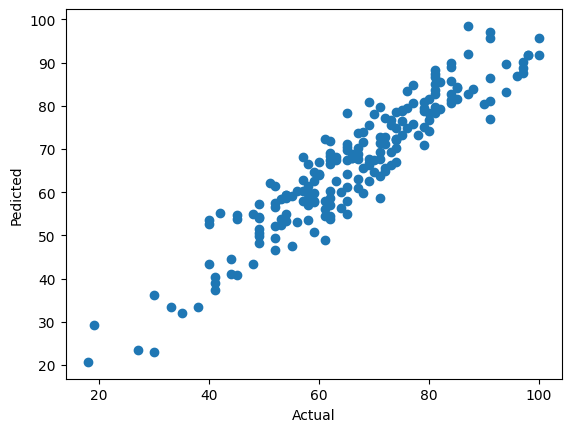

In [38]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Pedicted")

<Axes: xlabel='math_score'>

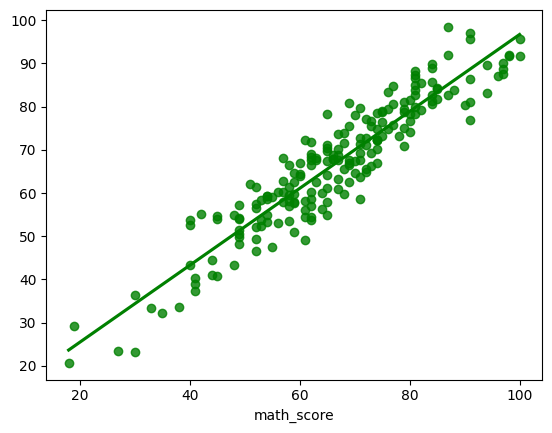

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="g")